#Aprendizagem Supervisionada: Regressão

# Importando:
##pandas : Biblioteca do Python muito usada na ánalise e manipulação de dados.
## sklearn : Essa biblioteca de ML possui vários algoritmos de classificação, regressão e agrupamento e etc.
## matplotlib : É uma biblioteca de plotagem de gráfico
### %matplotlib inline : Plota o gráfico no própio notebook
## numpy : É uma biblioteca do Python para trabalhar com arrays e matrizes multidimensionais fazendo operações matemáticas com essas estrututras.
##Seaborn: utiliza o Matplotlib como base e fornece funções simples de usar para criação de gráficos que seriam complexos apenas com o Matplotlib.

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
%matplotlib inline

##Lendo o Dataset por URL

In [4]:

df = pd.read_csv('https://raw.githubusercontent.com/dressalsl/introducaoScikitLearn/master/dataSets/Weather.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Visualizando o número de linhas x colunas

In [0]:
df.shape

(119040, 31)

##Visualizar detalhes estatísticos

In [0]:
df.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000,5563.0,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843,0.0,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,14.869361,14.481498,14.211082,0.0,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,78.000000,59.000000,69.000000,0.0,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,85.000000,70.000000,78.000000,0.0,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,89.000000,74.000000,81.000000,0.0,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


##Vamos plotar o nosos gráfico e observar o conjunto de dados para ver se podemos encontrar alguma relação entre eles.

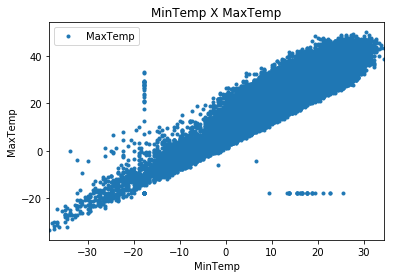

In [0]:
df.plot(x='MinTemp', y='MaxTemp', style='.')  
plt.title('MinTemp X MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

##Vamos plotar um gráfico para visualizar a temperatura máxima média e observamos que há uma grande concentração das temperaturas entre 25 e 35 graus.

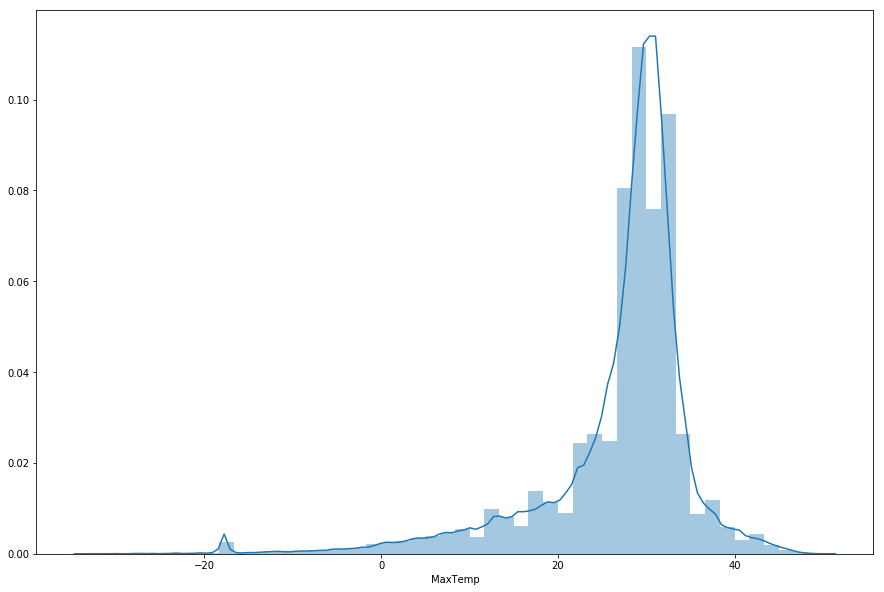

In [0]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['MaxTemp'])

##Dividimos os dados em "atributos" e "rótulos".Os atributos são as variáveis ​​independentes e os rótulos são variáveis ​​dependentes cujos valores devem ser previstos (são os alvos,propiedades). No nosso dataset, temos duas colunas e queremos prever o MaxTemp, dependendo do MinTemp.O nosso conjunto de atributos será a coluna "MinTemp" (variável x) e o rótulo será na coluna "MaxTemp"(variável y).

In [0]:
x = df['MinTemp'].values.reshape(-1,1)
y = df['MaxTemp'].values.reshape(-1,1)

##Depois dividimos 80% dos dados em treinamento e 20% dos dados em teste usando o código abaixo.Na variável test_size colocamos a proporção da quantidade de dados a serem testados e o random_state random_state gera sempre o mesmo modelo com os mesmos dados pois ele gera números pseudo aleatórios. 
**************************

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

##Depois de dividir os dados em conjuntos de treinamento e teste, vamos treinar nosso algoritmo.Importaremos a classe LinearRegression, instancia-la e chamar o método fit () junto com nossos dados de treinamento.


In [9]:
regressao = LinearRegression()  
regressao.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##A regressão linear encontra o melhor valor para a interceptação e a inclinação,que gera uma linha que melhor se ajusta aos dados. 

###Intercepção e Inclinação

In [10]:
print(regressao.intercept_)

print(regressao.coef_)

[10.66185201]
[[0.92033997]]


##Isso nos mostra que para cada unidade de mudança na temperatura mínima, a mudança na temperatura máxima é de cerca de 0,92%.

##Após treinarmos o nosso algoritmo vamos fazer algumas predições com os nossos dados de teste e veremos qual a precisão em percentual o nosso algoritmo consegue atingir.

In [0]:
y_predict = regressao.predict(x_test)

##Vamos comparar a saída dos valores reais para y_test com o valores previstos.
### .flatten() retorna uma cópia do array original e se modificar esse array o original não é modificado.



In [0]:
df = pd.DataFrame({'Atual': y_test.flatten(), 'Previsto': y_predict.flatten()})
df.head()

,Atual,Previsto
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852


##Também podemos visualizar o resultado da comparação como um gráfico de barras :

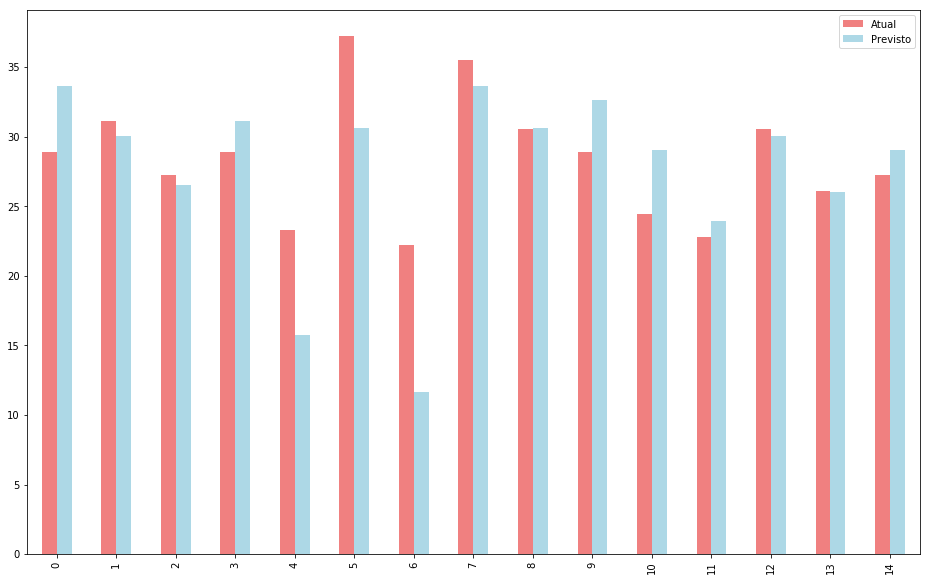

In [0]:
df1 = df.head(15)
df1.plot(kind='bar',figsize=(16,10), color = ("lightcoral","lightblue"))
plt.show()

##Por mais que o nosso modelo não seja preciso , as nossas porcentagens ficaram próximas das reais. Nosso gráfico apresentou uma linha reta que corta vários pontos e isso mostra que nosso algoritmo está correto Veremos isso no gráfico abaixo:


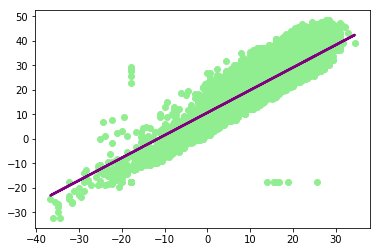

In [21]:
plt.scatter(x_test, y_test,  color='lightgreen')
plt.plot(x_test, y_predict, color='purple', linewidth=2.5)
plt.show()

##Vamos agora avaliar o desempenho de o quanto nossas predições se aproximaram dos valores reais usando algumas métricas .Usaremos 04 métricas: 
###- Mean Absolute Error (MAE): É a soma dos erros ( distância entre a reta roxa e os pontos verdes ) dividido pelo número de pontos.


In [22]:
print(metrics.mean_absolute_error(y_test, y_predict))

3.19932917837853


###- Mean Squared Error (MSE) : É similar ao  MAE, porém ele eleva ao quadrado as diferenças individuais e é mais sensivel aos grandes erros.




In [23]:
print(metrics.mean_squared_error(y_test, y_predict))

17.631568097568447


###- Root Mean Squared Error (RMSE) : É a raiz da média do erro quadrático da diferença entre o valor real e a predição.

In [24]:
 print(np.sqrt(metrics.mean_squared_error(y_test, y_predict)) )

4.198996082109204


###- Cross Validation: Testa como o modelo se comporta diante dos dados que não foram treinados. Estima o quanto é presciso esse modelo para um novo conjunto de dados.
#### cv = k-fold, que dividi o conjunto total de dados em k subconjuntos do mesmo tamanho em que calcula a acurácia do modelo a cada interação.

In [31]:
print((cross_val_score(regressao, x_test, y_test, cv = 10).mean()))

0.7663493975673099


## Podemos perceber que o nosso MSE é de 4.19, ou seja, são aproximadamente 23.77% das porcentagens de toda a temperatura, rasoavelmente nosso algoritmo conseguiria fazer previsões boas.

